In [19]:
import torch
from torch import tensor
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from torch import nn

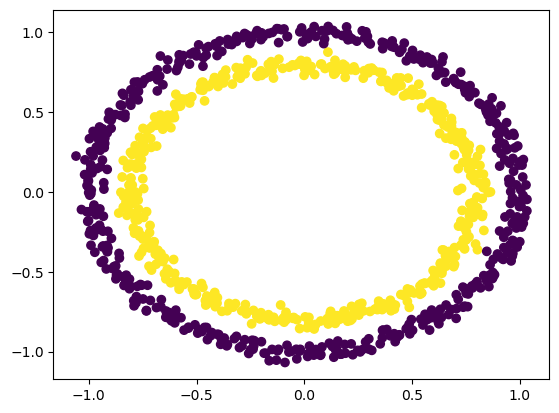

In [20]:
n_samples = 1000

X, y = make_circles(n_samples=1000,
    noise=0.03,
    random_state=42,
)

plt.scatter(X[:, 0], X[:, 1], c=y);

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
X_train = tensor(X_train, dtype=torch.float32)
X_test = tensor(X_test, dtype=torch.float32)
y_train = tensor(y_train, dtype=torch.float32)
y_test = tensor(y_test, dtype=torch.float32)

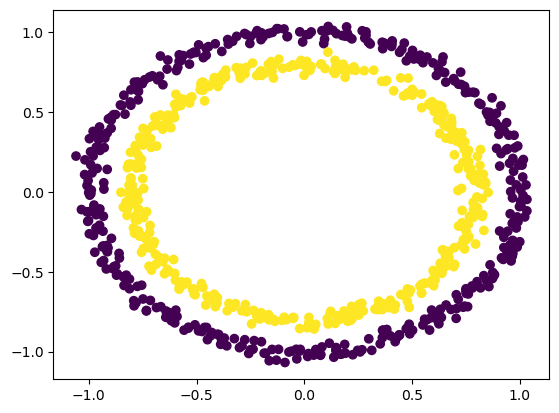

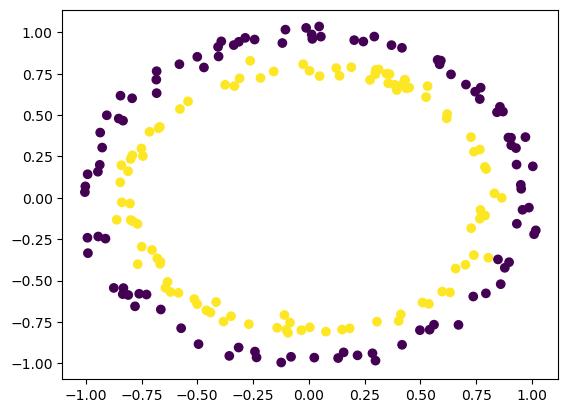

In [22]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.show()
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
plt.show()

In [23]:
class Circle_model(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(in_features=2, out_features=10)
        self.l2 = nn.Linear(in_features=10, out_features=10)
        self.l3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU()

    def forward(self, X):
        X1 = self.relu(self.l1(X))
        X2 = self.relu(self.l2(X1))
        return self.l3(X2)

model = Circle_model()

In [24]:
lr = 0.01
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
loss_fn = nn.BCEWithLogitsLoss()

In [25]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists, skipping download")
else:
    print("Downloading helper_functions.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


In [26]:
torch.manual_seed(42)

epochs = 300
for epoch in range(epochs):
    X_logits = model(X_train)
    loss = loss_fn(X_logits.squeeze(1), y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        with torch.inference_mode():
            test_loss = loss_fn(model(X_test).squeeze(1), y_test)
            print(f'epoch: {epoch} | loss: {test_loss}')


epoch: 0 | loss: 0.6920302510261536
epoch: 10 | loss: 0.6840111613273621
epoch: 20 | loss: 0.6714928150177002
epoch: 30 | loss: 0.6529502272605896
epoch: 40 | loss: 0.6234031319618225
epoch: 50 | loss: 0.5769527554512024
epoch: 60 | loss: 0.5293537974357605
epoch: 70 | loss: 0.45494964718818665
epoch: 80 | loss: 0.3586089313030243
epoch: 90 | loss: 0.27243614196777344
epoch: 100 | loss: 0.2068384736776352
epoch: 110 | loss: 0.15009647607803345
epoch: 120 | loss: 0.11235172301530838
epoch: 130 | loss: 0.08570683747529984
epoch: 140 | loss: 0.06903208047151566
epoch: 150 | loss: 0.05429747700691223
epoch: 160 | loss: 0.04548411816358566
epoch: 170 | loss: 0.03888731822371483
epoch: 180 | loss: 0.03403693065047264
epoch: 190 | loss: 0.030779313296079636
epoch: 200 | loss: 0.02743278257548809
epoch: 210 | loss: 0.02505732700228691
epoch: 220 | loss: 0.024136651307344437
epoch: 230 | loss: 0.021814456209540367
epoch: 240 | loss: 0.020315879955887794
epoch: 250 | loss: 0.01916775293648243
ep

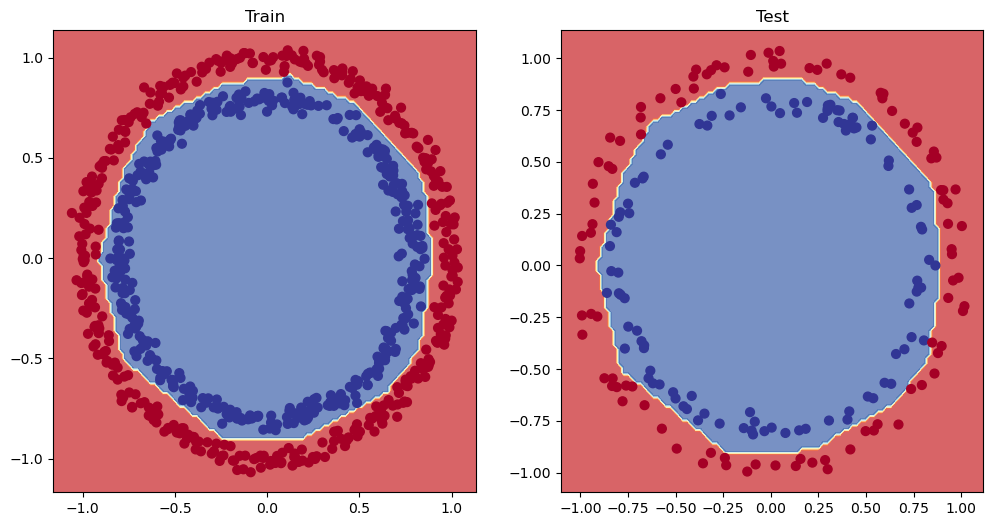

In [27]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model, X_test, y_test)